# 1. Importing the Libraries

In [31]:
# importing packages

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')
import yaml
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import mysql.connector
import seaborn as sns



# 2. Data Extraction

In [2]:
# loading the data 

amazon_df = pd.read_csv("amazon_prime_titles.csv")
disney_df = pd.read_csv("disney_plus_titles.csv")
netflix_df = pd.read_csv("netflix_titles.csv")


# 3. Exploratory Data Analysis

## 3.1 Shape

In [3]:
amazon_df.shape

(9668, 12)

In [4]:
disney_df.shape

(1450, 12)

In [5]:
netflix_df.shape

(8807, 12)

## 3.2 Data Types

In [6]:
amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7585 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


In [7]:
disney_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


In [8]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## 3.3 Checking missing values

In [9]:
amazon_df.isnull().sum()

show_id            0
type               0
title              0
director        2083
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64

In [10]:
disney_df.isnull().sum()

show_id           0
type              0
title             0
director        473
cast            190
country         219
date_added        3
release_year      0
rating            3
duration          0
listed_in         0
description       0
dtype: int64

In [11]:
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

## 3.4 Checking duplicate values

In [12]:
amazon_df.duplicated().sum()

0

In [13]:
disney_df.duplicated().sum()

0

In [14]:
netflix_df.duplicated().sum()

0

# 4. Data Transformation

## 4.1 Data Cleaning

### 4.1.1 Amazon

Country and date_added columns have more than 80% of the missing values and hence dropping them.

In [15]:
# Dropping columns 

amazon_df = amazon_df.drop(['country', 'date_added'], axis=1)

# Removing rows with null values in 'rating' column

amazon_df.dropna(subset=['rating'], inplace=True)

# Dropping irrelevant columns for analysis

amazon_df = amazon_df.drop(['show_id','director','cast'], axis=1)

### 4.1.2 Disney_Plus

In [16]:
# Dropping columns 

disney_df = disney_df.drop(['country', 'date_added'], axis=1)

# Removing rows with null values in 'rating' column

disney_df.dropna(subset=['rating'], inplace=True)

# Dropping irrelevant columns for analysis

disney_df = disney_df.drop(['show_id','director','cast'], axis=1)

### 4.1.3 Netflix

In [17]:
# Dropping columns 

netflix_df = netflix_df.drop(['country', 'date_added'], axis=1)

# Removing rows with null values in 'rating' column

netflix_df.dropna(subset=['rating', 'duration'], inplace=True)

# Dropping irrelevant columns for analysis

netflix_df = netflix_df.drop(['show_id','director','cast'], axis=1)

## 4.2 Adding new columns

In [18]:
amazon_df['platform'] = 'Amazon Prime'
amazon_df['headquarters'] = 'Seattle, Washington'
amazon_df['date_founded'] = '02/02/2005'

disney_df['platform'] = 'Disney Plus'
disney_df['headquarters'] = 'Los Angeles, California'
disney_df['date_founded'] = '11/12/2019'

netflix_df['platform'] = 'Netflix'
netflix_df['headquarters'] = 'Los Gatos, California'
netflix_df['date_founded'] = '08/29/1997'

## 4.3 Merging the data frames

Merging all the three data frames to a single dataframe for analysis.

In [19]:
streaming_platforms_df = pd.concat([amazon_df,disney_df,netflix_df], ignore_index=True)

streaming_platforms_df.head()

,type,title,release_year,rating,duration,listed_in,description,platform,headquarters,date_founded
0,Movie,Take Care Good Night,2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...,Amazon Prime,"Seattle, Washington",02/02/2005
1,Movie,Zoombies,2016,13+,87 min,"Horror, Science Fiction",When a strange virus quickly spreads through a...,Amazon Prime,"Seattle, Washington",02/02/2005
2,TV Show,Zoo Babies,2008,ALL,1 Season,"Kids, Special Interest",A heart warming and inspiring series that welc...,Amazon Prime,"Seattle, Washington",02/02/2005
3,TV Show,Zoë Coombs Marr: Bossy Bottom,2020,18+,1 Season,"Comedy, Talk Show and Variety",Zoë Coombs Marr has been on hiatus. Sort of. F...,Amazon Prime,"Seattle, Washington",02/02/2005
4,Movie,Zoe,2018,R,104 min,Science Fiction,ZOE tells a tale of forbidden love between an ...,Amazon Prime,"Seattle, Washington",02/02/2005


In [20]:
streaming_platforms_df.shape

(19578, 10)

## 4.4 Renaming the Column

In [21]:
streaming_platforms_df.rename(columns={'listed_in':'genre'}, inplace=True)

## 4.5 Formatting the data types

Convert the string data type of 'date_founded' to datetime.

In [22]:
streaming_platforms_df['date_founded'] = pd.to_datetime(streaming_platforms_df['date_founded'])

## 4.6 Replacing the column values

The dataset contains several redundant rating categories. For example, rating category 16, AGES_16_, 16+ represent the same category 16+. For analysis purpose, we replace the rating category values to a unified value.

In [23]:
streaming_platforms_df['rating'].value_counts()

rating
TV-MA       3284
TV-14       2447
13+         2117
R           1809
16+         1547
TV-PG       1333
ALL         1268
18+         1243
PG-13        949
PG           776
TV-G         619
TV-Y7        504
TV-Y         431
G            387
7+           385
NR           303
TV-NR        105
UNRATED       33
TV-Y7-FV      19
NC-17          6
AGES_18_       3
NOT_RATE       3
UR             3
AGES_16_       2
ALL_AGES       1
16             1
Name: count, dtype: int64

In [24]:
streaming_platforms_df['rating'].replace(['16','AGES_16_'], '16+', inplace=True)
streaming_platforms_df['rating'].replace(['AGES_18_'], '18+', inplace=True)
streaming_platforms_df['rating'].replace(['ALL_AGES'], 'ALL', inplace=True)
streaming_platforms_df['rating'].replace(['TV-NR','UNRATED','NOT_RATE','UR'], 'NR', inplace=True)

In [25]:
streaming_platforms_df.head()

,type,title,release_year,rating,duration,genre,description,platform,headquarters,date_founded
0,Movie,Take Care Good Night,2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...,Amazon Prime,"Seattle, Washington",2005-02-02
1,Movie,Zoombies,2016,13+,87 min,"Horror, Science Fiction",When a strange virus quickly spreads through a...,Amazon Prime,"Seattle, Washington",2005-02-02
2,TV Show,Zoo Babies,2008,ALL,1 Season,"Kids, Special Interest",A heart warming and inspiring series that welc...,Amazon Prime,"Seattle, Washington",2005-02-02
3,TV Show,Zoë Coombs Marr: Bossy Bottom,2020,18+,1 Season,"Comedy, Talk Show and Variety",Zoë Coombs Marr has been on hiatus. Sort of. F...,Amazon Prime,"Seattle, Washington",2005-02-02
4,Movie,Zoe,2018,R,104 min,Science Fiction,ZOE tells a tale of forbidden love between an ...,Amazon Prime,"Seattle, Washington",2005-02-02


### 5. Data Loading

In [26]:
import mysql.connector

try:
    # Connect to MySQL
    connection = mysql.connector.connect(
        host="localhost",
        user="cfitzpatrick",
        passwd="your_password",
        database="Group_5"
    )

   
    cursor = connection.cursor()

    # Define SQL statements to create tables
    create_movie_table_query = """
    CREATE TABLE IF NOT EXISTS movie (
        id INT AUTO_INCREMENT PRIMARY KEY,
        title VARCHAR(255),
        release_year INT,
        rating VARCHAR(10),
        duration VARCHAR(20),
        description TEXT,
        platform VARCHAR(50),
        headquarters VARCHAR(100),
        date_founded DATE
    )
    """

    create_genre_table_query = """
    CREATE TABLE IF NOT EXISTS genre (
        id INT AUTO_INCREMENT PRIMARY KEY,
        genre_name VARCHAR(255) UNIQUE
    )
    """

    create_streaming_platform_table_query = """
    CREATE TABLE IF NOT EXISTS streaming_platform (
        id INT AUTO_INCREMENT PRIMARY KEY,
        platform_name VARCHAR(50) UNIQUE,
        headquarters VARCHAR(100),
        date_founded DATE
    )
    """

    create_tv_show_table_query = """
    CREATE TABLE IF NOT EXISTS tv_show (
        id INT AUTO_INCREMENT PRIMARY KEY,
        title VARCHAR(255),
        release_year INT,
        rating VARCHAR(10),
        duration VARCHAR(20),
        description TEXT,
        platform VARCHAR(50),
        headquarters VARCHAR(100),
        date_founded DATE
    )
    """

    # Execute the queries
    cursor.execute(create_movie_table_query)
    cursor.execute(create_genre_table_query)
    cursor.execute(create_streaming_platform_table_query)
    cursor.execute(create_tv_show_table_query)

    # Commit the transaction
    connection.commit()

    print("Tables created successfully!")

except mysql.connector.Error as error:
    print("Error:", error)


Tables created successfully!


In [27]:
# Create rating table
try:
    cursor.execute("""
    CREATE TABLE IF NOT EXISTS rating (
        id INT AUTO_INCREMENT PRIMARY KEY,
        rating_value VARCHAR(10) NOT NULL
    )
    """)
    
    print("Table 'rating' created successfully!")

except mysql.connector.Error as error:
    print("Error:", error)

Table 'rating' created successfully!


In [28]:
#See the tables for Group_5 schema 
query = "SHOW TABLES"
cursor.execute(query)
tables = cursor.fetchall()

# Print the table names
for table in tables:
    print(table[0])

genre
genre1
genre2
movie
movie_genre
movie_platform
rating
streaming_platform
tv_show
tv_show_genre
tv_show_platform


### Load data into SQL database tables 

In [29]:
# Iterate over each row in the DataFrame
for index, row in streaming_platforms_df.iterrows():
    # Check if the platform already exists
    platform_query = "SELECT * FROM streaming_platform WHERE platform_name = %s"
    cursor.execute(platform_query, (row['platform'],))
    existing_platform = cursor.fetchone()

    if not existing_platform:
        # Insert into streaming_platform table
        streaming_platform_query = "INSERT INTO streaming_platform (platform_name, headquarters, date_founded) VALUES (%s, %s, %s)"
        streaming_platform_data = (row['platform'], row['headquarters'], str(row['date_founded']))
        cursor.execute(streaming_platform_query, streaming_platform_data)

    # Insert into movie or TV show table
    if row['type'] == 'Movie':
        movie_query = "INSERT INTO movie (title, release_year, rating, duration, description, platform, headquarters, date_founded) VALUES (%s, %s, %s, %s, %s, %s, %s, %s)"
        movie_data = (row['title'], row['release_year'], row['rating'], row['duration'], row['description'], row['platform'], row['headquarters'], str(row['date_founded']))
        cursor.execute(movie_query, movie_data)
    elif row['type'] == 'TV Show':
        tv_show_query = "INSERT INTO tv_show (title, release_year, rating, duration, description, platform, headquarters, date_founded) VALUES (%s, %s, %s, %s, %s, %s, %s, %s)"
        tv_show_data = (row['title'], row['release_year'], row['rating'], row['duration'], row['description'], row['platform'], row['headquarters'], str(row['date_founded']))
        cursor.execute(tv_show_query, tv_show_data)

# Commit the changes and close the connection
connection.commit()

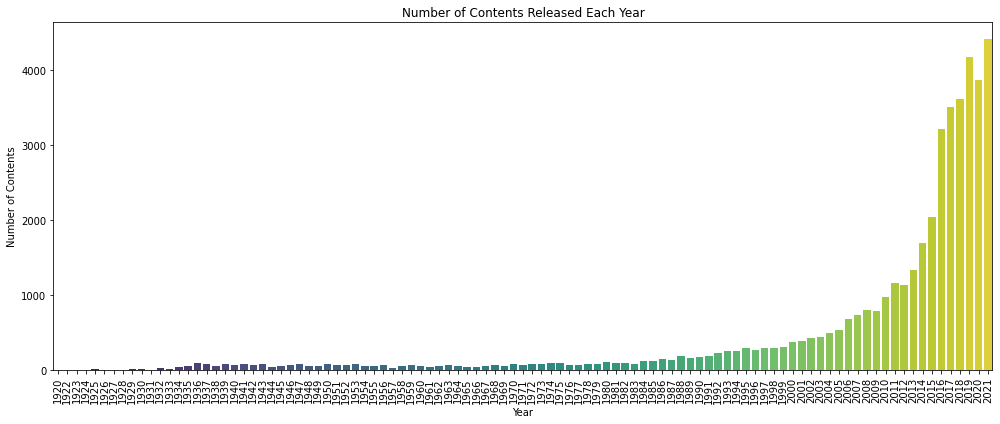

In [32]:
query = """
SELECT release_year, COUNT(*) as count
FROM movie
GROUP BY release_year
ORDER BY release_year;
"""

# Use pandas to load the query result into a DataFrame
df_content_per_year = pd.read_sql(query, connection)

# Plotting the data
plt.figure(figsize=(14,6))
sns.barplot(x=df_content_per_year['release_year'], y=df_content_per_year['count'], palette="viridis")
plt.title('Number of Contents Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Contents')
plt.xticks(rotation=90)  # Rotate x-axis labels to vertical
plt.tight_layout()
plt.show()

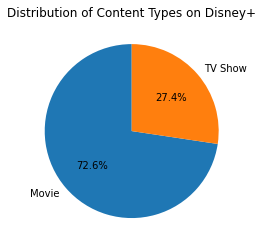

In [34]:
#Simply looking at percentage of Movie and TV shows 
content_type_dist = disney_df['type'].value_counts()

plt.figure(figsize=(4,4))
content_type_dist.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Content Types on Disney+')
plt.ylabel('')  #hiding y axis since it is distractive 
plt.show()

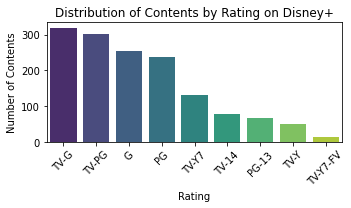

In [35]:
rating_counts = disney_df['rating'].value_counts()

plt.figure(figsize=(5,3))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')
plt.title('Distribution of Contents by Rating on Disney+')
plt.xlabel('Rating')
plt.ylabel('Number of Contents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Axes: xlabel='release_year', ylabel='rating'>

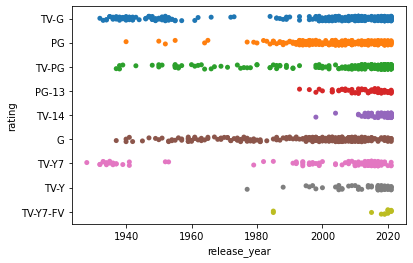

In [36]:
sns.stripplot(x='release_year' , y='rating', data=disney_df)

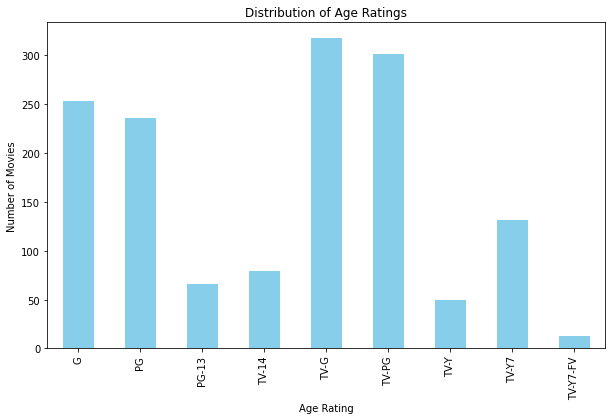

In [37]:
plt.figure(figsize=(10, 6))
rating_counts.sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Age Ratings')
plt.xlabel('Age Rating')
plt.ylabel('Number of Movies')
plt.show()

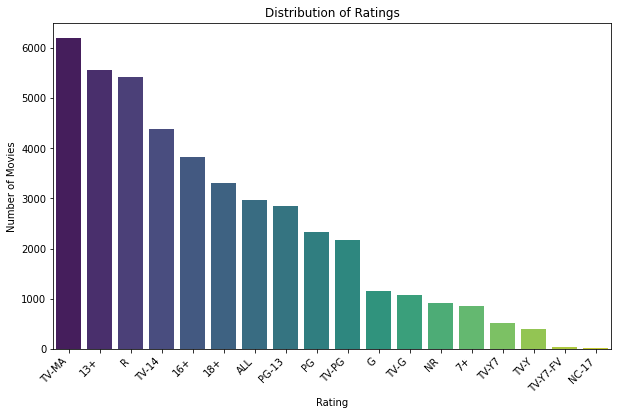

In [41]:
query = """
SELECT *
FROM movie;
"""

# Use pandas to load the query result into a DataFrame
movies_df = pd.read_sql(query, connection)


# Distribution of ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=movies_df, order=movies_df['rating'].value_counts().index, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.show()

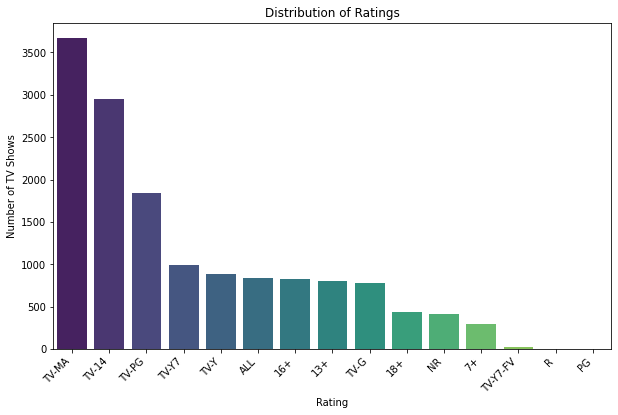

In [42]:
query = """
SELECT *
FROM tv_show;
"""

# Use pandas to load the query result into a DataFrame
shows_df = pd.read_sql(query, connection)

# Distribution of ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=shows_df, order=shows_df['rating'].value_counts().index, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of TV Shows')
plt.xticks(rotation=45, ha='right')
plt.show()

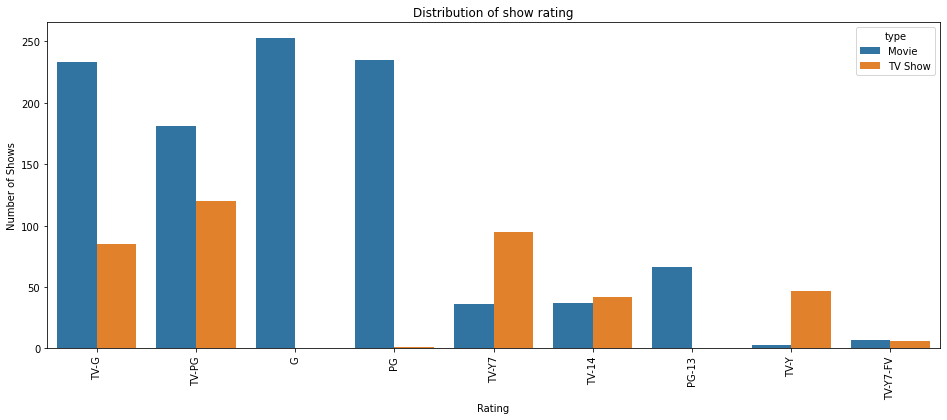

In [43]:
data_count1=disney_df['rating'].value_counts().reset_index()
plt.figure(figsize=(16,6))
sns.countplot(x='rating',data=disney_df,hue='type',order=disney_df['rating'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of show rating')
plt.xlabel('Rating')
plt.ylabel('Number of Shows')
plt.show()

In [56]:
streaming_platforms_df

,type,title,release_year,rating,duration,genre,description,platform,headquarters,date_founded
0,Movie,Take Care Good Night,2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...,Amazon Prime,"Seattle, Washington",2005-02-02
1,Movie,Zoombies,2016,13+,87 min,"Horror, Science Fiction",When a strange virus quickly spreads through a...,Amazon Prime,"Seattle, Washington",2005-02-02
2,TV Show,Zoo Babies,2008,ALL,1 Season,"Kids, Special Interest",A heart warming and inspiring series that welc...,Amazon Prime,"Seattle, Washington",2005-02-02
3,TV Show,Zoë Coombs Marr: Bossy Bottom,2020,18+,1 Season,"Comedy, Talk Show and Variety",Zoë Coombs Marr has been on hiatus. Sort of. F...,Amazon Prime,"Seattle, Washington",2005-02-02
4,Movie,Zoe,2018,R,104 min,Science Fiction,ZOE tells a tale of forbidden love between an ...,Amazon Prime,"Seattle, Washington",2005-02-02
...,...,...,...,...,...,...,...,...,...,...
19573,Movie,Zodiac,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",Netflix,"Los Gatos, California",1997-08-29
19574,TV Show,Zombie Dumb,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",Netflix,"Los Gatos, California",1997-08-29
19575,Movie,Zombieland,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,Netflix,"Los Gatos, California",1997-08-29
19576,Movie,Zoom,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",Netflix,"Los Gatos, California",1997-08-29


## Dashboard

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
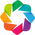

Launching server at http://localhost:50327


In [62]:
import pandas as pd
import panel as pn
import holoviews as hv
from holoviews import opts



# Load the Bokeh extension for interactive plotting
hv.extension('bokeh')

# Define the function to create plots based on selected platform
def create_plots(platform):
    data = streaming_platforms_df[streaming_platforms_df['platform'] == platform]
    
    # Genre breakdown (top 10)
    genre_counts = data['genre'].value_counts().head(10)
    genre_plot = hv.Bars(genre_counts).opts(
        width=600, height=400, title=f'Top 10 Genre Distribution for {platform}', xlabel='Genre', ylabel='Count')
    
    # Rating breakdown
    rating_plot = hv.Bars(data.groupby('rating').size()).opts(
        width=600, height=400, title=f'Rating Distribution for {platform}', xlabel='Rating', ylabel='Count')
    
    # Release year breakdown
    release_year_plot = hv.Bars(data.groupby('release_year').size()).opts(
        width=800, height=400, title=f'Release Year Distribution for {platform}', xlabel='Release Year', ylabel='Count')
    
    return (genre_plot + rating_plot + release_year_plot).cols(1)

# Get unique platforms
platforms = streaming_platforms_df['platform'].unique().tolist()

# Create interactive widgets
interact = pn.interact(create_plots, platform=platforms)

# Create a title for the dashboard
title = pn.pane.Markdown('## Streaming Service Visualization Dashboard')

# Display the dashboard
pn.Column(title, interact).show()
